In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
%load_ext google.cloud.bigquery
from google.cloud import bigquery

client=bigquery.Client()
project_id = "som-nero-phi-jonc101"

/Users/sandychen/Desktop/Healthrex_workspace/scripts/Blood_Culture_Stewardship/blood_culture_env/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/sandychen/Desktop/Healthrex_workspace/scripts/Blood_Culture_Stewardship/blood_culture_env/lib/python3.9/site-packages/google/cloud/bigquery/__init__.py:237: FutureWarning: %load_ext google.cloud.bigquery is deprecated. Install bigquery-magics package and use `%load_ext bigquery_magics`, instead.
  warnings.warn(


In [2]:
# demo
table_id_final_base_demo =  f"{project_id}.blood_culture_stewardship_sandy_2024.enriched_label_filtered_adult_only_analysis_cohort"

final_base_demo = client.query(f"SELECT * FROM `{table_id_final_base_demo}`").to_dataframe()
# labs
table_id_final_base_labs_lda_ua = f"{project_id}.blood_culture_stewardship_sandy_2024.final_base_labs_without_cpr_or_pct_lda_encouter_level_adult"
final_base_labs_ua_lda= client.query(f"SELECT * FROM `{table_id_final_base_labs_lda_ua}`").to_dataframe()
# vitals
table_id_final_base_vitals =f"{project_id}.blood_culture_stewardship_sandy_2024.final_base_vitals_adult_encounter_level"
final_base_vitals= client.query(f"SELECT * FROM `{table_id_final_base_vitals}`").to_dataframe()

table_id_final_labs_cr_only = f"{project_id}.blood_culture_stewardship_sandy_2024.final_base_labs_cr_only_encounter_level_adult"
final_labs_cr_only = client.query(f"SELECT * FROM `{table_id_final_labs_cr_only}`").to_dataframe()



In [3]:
# Alternative: Using functools.reduce to merge multiple dataframes at once
from functools import reduce

# Define merge keys
key_cols = ["anon_id", "pat_enc_csn_id_coded", "order_proc_id_coded", "blood_culture_order_datetime_utc"]

# List of dataframes to merge
dfs_to_merge = [final_base_demo, final_base_labs_ua_lda, final_base_vitals, final_labs_cr_only]

# Merge all dataframes
all_features_df = reduce(
    lambda left, right: pd.merge(left, right, on=key_cols, how="inner"),
    dfs_to_merge
)

print(f"Shape of merged features: {all_features_df.shape}")
print(f"Number of rows: {len(all_features_df)}")
all_features_df.head()


Shape of merged features: (101812, 112)
Number of rows: 101812


,anon_id,pat_enc_csn_id_coded,order_proc_id_coded,blood_culture_order_datetime_utc,order_year,ordering_mode,department_id,description,order_status,lab_status,abnormal_yn,department_name,ed_arrival_datetime_utc,ord_value,comment,organisms,n_organisms,n_potential_contam_orgs,n_non_potential_orgs,n_cons_organism,total_sets_in_encounter,has_sensitivity,cons_sets_in_encounter,potential_contam_sets_same_org,set_promoted_from_potential_contam,set_level_label,final_label,encounter_promoted_from_potential_contam,gender,bmi,age,min_wbc,max_wbc,avg_wbc,median_wbc,min_neutrophils,max_neutrophils,avg_neutrophils,median_neutrophils,min_anc,max_anc,avg_anc,median_anc,min_lymphocytes,max_lymphocytes,avg_lymphocytes,median_lymphocytes,min_alc,max_alc,avg_alc,median_alc,min_hgb,max_hgb,avg_hgb,median_hgb,min_plt,max_plt,avg_plt,median_plt,min_glucose,max_glucose,avg_glucose,median_glucose,min_lactate,max_lactate,avg_lactate,median_lactate,min_crp,max_crp,avg_crp,median_crp,has_any_line,temp_min_c,temp_avg_c,temp_max_c,temp_median_c,temp_mode_c,temp_6h_first,temp_6h_last,minutes_span_6h,hours_span_6h,temp_delta_6h,temp_slope_6h_c_per_hr,resp_min,resp_avg,resp_max,resp_median,resp_mode,hr_min,hr_avg,hr_max,hr_median,hr_mode,sysbp_min,sysbp_avg,sysbp_max,sysbp_median,sysbp_mode,diabp_min,diabp_avg,diabp_max,diabp_median,diabp_mode,spo2_min,spo2_avg,spo2_max,spo2_median,spo2_mode,min_cr,max_cr,avg_cr,median_cr
0,JC1000129,131354606122,876959986,2023-04-23 22:44:00+00:00,2023,Inpatient,110100019,BLOOD CULTURE (2 AEROBIC BOTTLES),Completed,Final result,Y,ADULT EMERGENCY DEPARTMENT,2023-04-23 22:41:00+00:00,Both Aerobic bottles: Lactose fermenting Gram ...,"for identification and susceptibility testing,...",None,<NA>,<NA>,<NA>,<NA>,2,False,0,<NA>,0,negative,positive,0,Male,22.45,87,16.9,16.9,16.9,16.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8,0.8,0.8,0.8,0.14,0.14,0.14,0.14,11.8,11.8,11.8,11.8,194.0,194.0,194.0,194.0,165.0,165.0,165.00,165.0,3.56,6.44,5.05,4.42,NaN,NaN,NaN,NaN,0,37.000000,37.000000,37.000000,37.000000,37.0,37.000000,37.000000,0,0.000000,0.000000,NaN,22.0,26.000000,28.0,28.0,28.0,70.0,74.250000,77.0,74.0,70.0,85.0,106.0,117.0,116.0,85.0,43.0,50.666667,58.0,51.0,43.0,97.0,98.333333,100.0,98.0,97.0,2.83,2.83,2.83,2.83
1,JC1000159,131233687107,528085198,2017-06-25 16:42:00+00:00,2017,Inpatient,2001002,BLOOD CULTURE (2 AEROBIC BOTTLES),Completed,Edited Result - FINAL,Y,PEDIATRIC EMERGENCY DEPARTMENT,2017-06-25 16:38:00+00:00,Both Aerobic bottles: Escherichia coli,Not all antibiotics for which susceptibility r...,ESCHERICHIA COLI,1,0,1,0,2,True,0,0,0,positive,positive,0,Female,26.61,94,15.4,15.4,15.4,15.4,91.5,91.5,91.5,91.5,14.10,14.10,14.10,14.10,3.1,3.1,3.1,3.1,0.48,0.48,0.48,0.48,9.2,9.2,9.2,9.2,109.0,109.0,109.0,109.0,155.0,155.0,155.00,155.0,1.50,1.70,1.60,1.50,NaN,NaN,NaN,NaN,0,37.500000,38.055556,38.611111,37.500000,37.5,37.500000,38.611111,61,1.016667,1.111111,1.092896,24.0,26.000000,28.0,24.0,24.0,95.0,95.000000,95.0,95.0,95.0,161.0,162.0,163.0,161.0,161.0,66.0,70.500000,75.0,66.0,66.0,92.0,94.000000,96.0,92.0,92.0,0.87,0.87,0.87,0.87
2,JC1000413,131018846539,401262600,2012-04-20 05:09:00+00:00,2012,Inpatient,2001002,BLOOD CULTURE (AEROBIC & ANAEROBIC BOTTLES),Completed,Final result,None,PEDIATRIC EMERGENCY DEPARTMENT,2012-04-20 04:39:00+00:00,05262012 FINAL; right antecubital; BLOOD,NO GROWTH 6 DAYS\nPerformed at Stanford Clinic...,None,<NA>,<NA>,<NA>,<NA>,1,False,0,<NA>,0,negative,negative,0,Male,18.73,92,8.9,8.9,8.9,8.9,NaN,NaN,NaN,NaN,6.61,6.61,6.61,6.61,12.8,12.8,12.8,12.8,1.14,1.14,1.14,1.14,12.0,12.0,12.0,12.0,264.0,264.0,264.0,264.0,125.0,125.0,125.00,125.0,0.70,0.70,0.70,0.70,NaN,NaN,NaN,NaN,0,36.444444,36.444444,36.444444,36.444444,36.4,36.444444,36.444444,0,0.000000,0.000000,NaN,18.0,20.000000,22.0,18.0,18.0,91.0,96.500000,102.0,91.0,91.0,128.0,128.0,128.0,128.0,128.0,70.0,70.000000,70.0,70.0,70.0,97.0,98.000000,99.0,97.0,97.0,1.90,1.90,1.90,1.90
3,JC1000492,131356383252,883656152,2023-07-11 00:58:00+00:00,2023,Inpatient,1101

In [59]:

table_id_analyse_cohort_withfinal_label_adul_all_features = f"{project_id}.blood_culture_stewardship_sandy_2024.enriched_label_filtered_adult_only_analysis_cohort_all_features"

# Upload the DataFrame to BigQuery
all_features_df.to_gbq(
    destination_table=table_id_analyse_cohort_withfinal_label_adul_all_features,
    project_id=project_id,
    if_exists='replace'  # This will replace the table if it exists
)

print(f"Uploaded Adult_ED_BCx_order_cohort_strict_bmi_age_gender to {table_id_analyse_cohort_withfinal_label_adul_all_features}")

/var/folders/d1/3gdyy98d6h1d9pxx47s40vv40000gp/T/ipykernel_35386/1364828882.py:4: FutureWarning: to_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.to_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.to_gbq
  all_features_df.to_gbq(
100%|██████████| 1/1 [00:00<00:00, 2380.42it/s]

Uploaded Adult_ED_BCx_order_cohort_strict_bmi_age_gender to som-nero-phi-jonc101.blood_culture_stewardship_sandy_2024.enriched_label_filtered_adult_only_analysis_cohort_all_features


# do feature engineering and select only clinically relevant features

In [4]:
import numpy as np
import pandas as pd

def _safe_divide(a, b):
    return np.where((b == 0) | pd.isna(b), np.nan, a / b)

def build_core_features(df):
    """
    Inputs: df with raw columns
      age, gender, bmi, has_any_line,
      hr_max, sysbp_min, diabp_min, resp_max, spo2_min, temp_max_c,
      max_wbc, max_neutrophils, max_anc, min_lymphocytes, min_hgb, min_plt,
      max_glucose, max_lactate, max_cr, max_crp,
      (optional) temp_delta_6h

    Returns: DataFrame with base + derived flags + shock_index
    """

    d = df.copy()

    # --- Gender (binary encoding) ---
    gender_map = {'m':1,'male':1,1:1,True:1,'f':0,'female':0,0:0,False:0}
    d["gender_binary"] = (
        d["gender"].astype(str).str.strip().str.lower().map(gender_map)
    ).astype(float)

    # --- Derived continuous features ---
    d["shock_index"] = _safe_divide(d["hr_max"], d["sysbp_min"])

    # --- Binary clinical flags ---
    d["fever_flag"]             = (d["temp_max_c"]      >= 38.0).astype(float)
    d["hypotension_flag"]       = (d["sysbp_min"]       <= 90.0).astype(float)
    d["tachycardia_flag"]       = (d["hr_max"]          >= 100 ).astype(float)
    d["tachypnea_flag"]         = (d["resp_max"]        >= 22  ).astype(float)
    d["hypoxia_flag"]           = (d["spo2_min"]        <= 94  ).astype(float)
    d["hyperglycemia_flag"]     = (d["max_glucose"]     > 127  ).astype(float)
    d["hyperlactate_flag"]      = (d["max_lactate"]     > 2.0  ).astype(float)
    d["renal_impairment_flag"]  = (d["max_cr"]          > 1.2  ).astype(float)
    d["inflammatory_flag"]      = (d["max_crp"]         > 10   ).astype(float)
    d["anemia_flag"]            = (d["min_hgb"]         < 12   ).astype(float)
    d["thrombocytopenia_flag"]  = (d["min_plt"]         < 150  ).astype(float)
    d["neutrophilia_flag"]      = (d["max_neutrophils"] > 70   ).astype(float)
    d["lymphopenia_flag"]       = (d["min_lymphocytes"] < 20   ).astype(float)

    # --- Composite flag (instability) ---
    d["composite_instability_flag"] = (
        (d["fever_flag"] == 1.0) |
        (d["hypotension_flag"] == 1.0) |
        (d["hyperlactate_flag"] == 1.0)
    ).astype(float)

    # --- Temperature delta (if available) ---
    if "temp_delta_6h" not in d.columns and {"temp_6h_first","temp_6h_last"}.issubset(d.columns):
        d["temp_delta_6h"] = d["temp_6h_last"] - d["temp_6h_first"]

    # --- Final feature list ---
    feature_cols = [
        # Demographics / context
        "age", "gender_binary", "bmi", "has_any_line",

        # Vitals
        "hr_max", "sysbp_min", "diabp_min", "resp_max", "spo2_min", "temp_max_c",

        # Hematology
        "max_wbc", "max_neutrophils", "max_anc", "min_lymphocytes", "min_hgb", "min_plt",

        # Metabolic
        "max_glucose", "max_lactate", "max_cr", "max_crp",

        # Temperature trend (optional)
        "temp_delta_6h",

        # Derived / flags
        "shock_index",
        "fever_flag", "hypotension_flag", "tachycardia_flag", "tachypnea_flag",
        "hypoxia_flag", "hyperglycemia_flag", "hyperlactate_flag",
        "renal_impairment_flag", "inflammatory_flag",
        "anemia_flag", "thrombocytopenia_flag",
        "neutrophilia_flag", "lymphopenia_flag",
        "composite_instability_flag",
    ]

    # Ensure all requested columns exist
    for c in feature_cols:
        if c not in d.columns:
            d[c] = np.nan

    return d[feature_cols].copy()




In [38]:
# Example usage
core_features_df = build_core_features(all_features_df)


In [58]:
all_features_df

,anon_id,pat_enc_csn_id_coded,order_proc_id_coded,blood_culture_order_datetime_utc,order_year,ordering_mode,department_id,description,order_status,lab_status,abnormal_yn,department_name,ed_arrival_datetime_utc,ord_value,comment,organisms,n_organisms,n_potential_contam_orgs,n_non_potential_orgs,n_cons_organism,total_sets_in_encounter,has_sensitivity,cons_sets_in_encounter,potential_contam_sets_same_org,set_promoted_from_potential_contam,set_level_label,final_label,encounter_promoted_from_potential_contam,gender,bmi,age,min_wbc,max_wbc,avg_wbc,median_wbc,min_neutrophils,max_neutrophils,avg_neutrophils,median_neutrophils,min_anc,max_anc,avg_anc,median_anc,min_lymphocytes,max_lymphocytes,avg_lymphocytes,median_lymphocytes,min_alc,max_alc,avg_alc,median_alc,min_hgb,max_hgb,avg_hgb,median_hgb,min_plt,max_plt,avg_plt,median_plt,min_glucose,max_glucose,avg_glucose,median_glucose,min_lactate,max_lactate,avg_lactate,median_lactate,min_crp,max_crp,avg_crp,median_crp,has_any_line,temp_min_c,temp_avg_c,temp_max_c,temp_median_c,temp_mode_c,temp_6h_first,temp_6h_last,minutes_span_6h,hours_span_6h,temp_delta_6h,temp_slope_6h_c_per_hr,resp_min,resp_avg,resp_max,resp_median,resp_mode,hr_min,hr_avg,hr_max,hr_median,hr_mode,sysbp_min,sysbp_avg,sysbp_max,sysbp_median,sysbp_mode,diabp_min,diabp_avg,diabp_max,diabp_median,diabp_mode,spo2_min,spo2_avg,spo2_max,spo2_median,spo2_mode,min_cr,max_cr,avg_cr,median_cr,label
0,JC1000129,131354606122,876959986,2023-04-23 22:44:00+00:00,2023,Inpatient,110100019,BLOOD CULTURE (2 AEROBIC BOTTLES),Completed,Final result,Y,ADULT EMERGENCY DEPARTMENT,2023-04-23 22:41:00+00:00,Both Aerobic bottles: Lactose fermenting Gram ...,"for identification and susceptibility testing,...",None,<NA>,<NA>,<NA>,<NA>,2,False,0,<NA>,0,negative,positive,0,Male,22.45,87,16.9,16.9,16.90,16.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8,0.8,0.8,0.8,0.14,0.14,0.14,0.14,11.8,11.8,11.80,11.8,194.0,194.0,194.0,194.0,165.0,165.0,165.00,165.0,3.56,6.44,5.05,4.42,NaN,NaN,NaN,NaN,0,37.000000,37.000000,37.000000,37.000000,37.0,37.000000,37.000000,0,0.000000,0.000000,NaN,22.0,26.000000,28.0,28.0,28.0,70.0,74.250000,77.0,74.0,70.0,85.0,106.000000,117.0,116.0,85.0,43.0,50.666667,58.0,51.0,43.0,97.0,98.333333,100.0,98.0,97.0,2.83,2.83,2.83,2.83,True
1,JC1000159,131233687107,528085198,2017-06-25 16:42:00+00:00,2017,Inpatient,2001002,BLOOD CULTURE (2 AEROBIC BOTTLES),Completed,Edited Result - FINAL,Y,PEDIATRIC EMERGENCY DEPARTMENT,2017-06-25 16:38:00+00:00,Both Aerobic bottles: Escherichia coli,Not all antibiotics for which susceptibility r...,ESCHERICHIA COLI,1,0,1,0,2,True,0,0,0,positive,positive,0,Female,26.61,94,15.4,15.4,15.40,15.4,91.5,91.5,91.5,91.5,14.10,14.10,14.10,14.10,3.1,3.1,3.1,3.1,0.48,0.48,0.48,0.48,9.2,9.2,9.20,9.2,109.0,109.0,109.0,109.0,155.0,155.0,155.00,155.0,1.50,1.70,1.60,1.50,NaN,NaN,NaN,NaN,0,37.500000,38.055556,38.611111,37.500000,37.5,37.500000,38.611111,61,1.016667,1.111111,1.092896,24.0,26.000000,28.0,24.0,24.0,95.0,95.000000,95.0,95.0,95.0,161.0,162.000000,163.0,161.0,161.0,66.0,70.500000,75.0,66.0,66.0,92.0,94.000000,96.0,92.0,92.0,0.87,0.87,0.87,0.87,True
2,JC1000413,131018846539,401262600,2012-04-20 05:09:00+00:00,2012,Inpatient,2001002,BLOOD CULTURE (AEROBIC & ANAEROBIC BOTTLES),Completed,Final result,None,PEDIATRIC EMERGENCY DEPARTMENT,2012-04-20 04:39:00+00:00,05262012 FINAL; right antecubital; BLOOD,NO GROWTH 6 DAYS\nPerformed at Stanford Clinic...,None,<NA>,<NA>,<NA>,<NA>,1,False,0,<NA>,0,negative,negative,0,Male,18.73,92,8.9,8.9,8.90,8.9,NaN,NaN,NaN,NaN,6.61,6.61,6.61,6.61,12.8,12.8,12.8,12.8,1.14,1.14,1.14,1.14,12.0,12.0,12.00,12.0,264.0,264.0,264.0,264.0,125.0,125.0,125.00,125.0,0.70,0.70,0.70,0.70,NaN,NaN,NaN,NaN,0,36.444444,36.444444,36.444444,36.444444,36.4,36.444444,36.444444,0,0.000000,0.000000,NaN,18.0,20.000000,22.0,18.0,18.0,91.0,96.500000,102.0,91.0,91.0,128.0,128.000000,128.0,128.0,128.0,70.0,70.000000,70.0,70.0,70.0,97.0,98.000000,99.0,97.0,97.0,1.90,1.90,1.90,1.90,False
3,JC1000492,131356383252,883656152,20

In [5]:
# prevalence of blood culture positive
all_features_df["label"] = all_features_df["final_label"] == "positive"
print(f"total number of rows: {all_features_df.shape[0]}")
train_data = all_features_df[all_features_df['order_year'] < 2023]
val_data = all_features_df[(all_features_df['order_year'] >= 2023) & (all_features_df['order_year'] < 2024)]
test_data = all_features_df[all_features_df['order_year'] >= 2024]

print(f"Train data shape: {train_data.shape} and is {train_data.shape[0] / all_features_df.shape[0] * 100}% of all data")
print(f"Val data shape: {val_data.shape} and is {val_data.shape[0] / all_features_df.shape[0] * 100}% of all data")
print(f"Test data shape: {test_data.shape} and is {test_data.shape[0] / all_features_df.shape[0] * 100}% of all data")

total number of rows: 101812
Train data shape: (73256, 113) and is 71.9522256708443% of all data
Val data shape: (13412, 113) and is 13.173299807488311% of all data
Test data shape: (15144, 113) and is 14.874474521667386% of all data


In [6]:

print(f"prevalence of blood culture positive in all data: {all_features_df['label'].mean() *100}%")
print(f"prevalence of blood culture positive in train data: {train_data['label'].mean() *100}%")
print(f"prevalence of blood culture positive in val data: {val_data['label'].mean() *100}%")
print(f"prevalence of blood culture positive in test data: {test_data['label'].mean() *100}%")

prevalence of blood culture positive in all data: 7.4991160177582215%
prevalence of blood culture positive in train data: 7.7563612536857045%
prevalence of blood culture positive in val data: 6.635848493886072%
prevalence of blood culture positive in test data: 7.019281563655573%


In [7]:

def make_split(df):
    X = build_core_features(df)
    y = (df['final_label'] == 'positive').astype(int)
    return X, y

train_X, train_y = make_split(train_data)
val_X,   val_y   = make_split(val_data)
test_X,  test_y  = make_split(test_data)

# Ensure identical column order
val_X  = val_X.reindex(columns=train_X.columns)
test_X = test_X.reindex(columns=train_X.columns)

print(train_X.shape, val_X.shape, test_X.shape)


(73256, 36) (13412, 36) (15144, 36)


In [53]:
all_X, all_y = make_split(all_features_df)

In [ ]:
all_X.column

In [8]:
train_X.columns

Index(['age', 'gender_binary', 'bmi', 'has_any_line', 'hr_max', 'sysbp_min',
       'diabp_min', 'resp_max', 'spo2_min', 'temp_max_c', 'max_wbc',
       'max_neutrophils', 'max_anc', 'min_lymphocytes', 'min_hgb', 'min_plt',
       'max_glucose', 'max_lactate', 'max_cr', 'max_crp', 'temp_delta_6h',
       'shock_index', 'fever_flag', 'hypotension_flag', 'tachycardia_flag',
       'tachypnea_flag', 'hypoxia_flag', 'hyperglycemia_flag',
       'hyperlactate_flag', 'renal_impairment_flag', 'inflammatory_flag',
       'anemia_flag', 'thrombocytopenia_flag', 'neutrophilia_flag',
       'lymphopenia_flag', 'composite_instability_flag'],
      dtype='object')

In [57]:
import numpy as np
import pandas as pd

# =====================================================
# 1. Merge engineered features back with original df
#    (dropping overlapping column names from X)
# =====================================================

def merge_features(original_df, X):
    """
    Returns a single dataframe containing both:
      - original clinical/raw fields
      - engineered ML features (with overlapping columns dropped)
    """
    X_reset    = X.reset_index(drop=True)
    orig_reset = original_df.reset_index(drop=True)

    # Identify overlaps and drop them from X so we keep the original versions
    overlap = set(orig_reset.columns) & set(X_reset.columns)
    if overlap:
        print("Dropping overlapping feature columns from X:", overlap)
        X_reset = X_reset.drop(columns=list(overlap))

    merged = pd.concat([orig_reset, X_reset], axis=1)
    return merged

train_full = merge_features(train_data, train_X)
val_full   = merge_features(val_data,   val_X)
test_full  = merge_features(test_data,  test_X)

# Build "all_full" consistently from the same pieces
all_raw = pd.concat([train_data, val_data, test_data], axis=0).reset_index(drop=True)
all_X   = pd.concat([train_X,   val_X,   test_X],   axis=0).reset_index(drop=True)
all_full = merge_features(all_raw, all_X)

datasets = {
    "All":        all_full,
    "Train":      train_full,
    "Validation": val_full,
    "Test":       test_full,
}

# =====================================================
# 2. Helper functions for baseline formatting
# =====================================================

def median_iqr(series):
    s = pd.to_numeric(series, errors="coerce").dropna()
    if s.empty:
        return "NA"
    q1, med, q3 = s.quantile([0.25, 0.5, 0.75])
    return f"{med:.1f} ({q1:.1f}–{q3:.1f})"

def count_pct(mask):
    m = pd.Series(mask).fillna(False)
    n = int(m.sum())
    d = len(m)
    if d == 0:
        return "0 (0.0)"
    return f"{n:,} ({100*n/d:.1f})"

def encounter_outcomes(df):
    # encounter-level: one row per encounter
    enc = df.drop_duplicates(subset=["anon_id", "pat_enc_csn_id_coded"])
    n = len(enc)
    pos = (enc["final_label"] == "positive").sum()
    cont = (enc["final_label"] == "contamination").sum()
    neg = (enc["final_label"] == "negative").sum()
    return {
        "n": n,
        "pos": f"{pos:,} ({100*pos/n:.1f})",
        "cont": f"{cont:,} ({100*cont/n:.1f})",
        "neg": f"{neg:,} ({100*neg/n:.1f})",
    }

# =====================================================
# 3. Build baseline table (you can tweak which rows to include)
# =====================================================

baseline = {}

for name, df in datasets.items():
    b = {}

    # ---- Encounter-level outcomes ----
    out = encounter_outcomes(df)
    b["Encounters, n"]        = f"{out['n']:,}"
    b["Bacteremia, n (%)"]    = out["pos"]
    b["Contamination, n (%)"] = out["cont"]
    b["Negative, n (%)"]      = out["neg"]

    # ---- Demographics ----
    b["Age, median (IQR), y"] = median_iqr(df["age"])
    b["Female, n (%)"]        = count_pct(df["gender"] == "Female")
    b["BMI, median (IQR), kg/m²"] = median_iqr(df["bmi"])
    b["Any invasive line, n (%)"] = count_pct(df["has_any_line"] == 1)

    # ---- Vitals (from engineered/original) ----
    b["Temp max, °C"]              = median_iqr(df["temp_max_c"])
    b["HR max, beats/min"]         = median_iqr(df["hr_max"])
    b["SBP min, mmHg"]             = median_iqr(df["sysbp_min"])
    b["Resp max, breaths/min"]     = median_iqr(df["resp_max"])
    b["SpO₂ min, %"]               = median_iqr(df["spo2_min"])
    b["Shock index"]               = median_iqr(df["shock_index"])

    # ---- Selected labs ----
    b["WBC max, 10³/µL"]           = median_iqr(df["max_wbc"])
    b["ANC max, 10³/µL"]           = median_iqr(df["max_anc"])
    b["Lymphocytes min"]           = median_iqr(df["min_lymphocytes"])
    b["Hemoglobin min, g/dL"]      = median_iqr(df["min_hgb"])
    b["Platelets min, 10³/µL"]     = median_iqr(df["min_plt"])
    b["Lactate max, mmol/L"]       = median_iqr(df["max_lactate"])
    b["Creatinine max, mg/dL"]     = median_iqr(df["max_cr"])
    b["CRP max, mg/dL"]            = median_iqr(df["max_crp"])

    baseline[name] = b

baseline_df = pd.DataFrame(baseline)
baseline_df


Dropping overlapping feature columns from X: {'max_wbc', 'max_anc', 'max_cr', 'bmi', 'max_glucose', 'age', 'max_neutrophils', 'max_crp', 'has_any_line', 'min_hgb', 'temp_delta_6h', 'max_lactate', 'temp_max_c', 'spo2_min', 'min_plt', 'diabp_min', 'resp_max', 'hr_max', 'min_lymphocytes', 'sysbp_min'}
Dropping overlapping feature columns from X: {'max_wbc', 'max_anc', 'max_cr', 'bmi', 'max_glucose', 'age', 'max_neutrophils', 'max_crp', 'has_any_line', 'min_hgb', 'temp_delta_6h', 'max_lactate', 'temp_max_c', 'spo2_min', 'min_plt', 'diabp_min', 'resp_max', 'hr_max', 'min_lymphocytes', 'sysbp_min'}
Dropping overlapping feature columns from X: {'max_wbc', 'max_anc', 'max_cr', 'bmi', 'max_glucose', 'age', 'max_neutrophils', 'max_crp', 'has_any_line', 'min_hgb', 'temp_delta_6h', 'max_lactate', 'temp_max_c', 'spo2_min', 'min_plt', 'diabp_min', 'resp_max', 'hr_max', 'min_lymphocytes', 'sysbp_min'}
Dropping overlapping feature columns from X: {'max_wbc', 'max_anc', 'max_cr', 'bmi', 'max_glucose', 

,All,Train,Validation,Test
"Encounters, n","101,812","73,256","13,412","15,144"
"Bacteremia, n (%)","7,635 (7.5)","5,682 (7.8)",890 (6.6),"1,063 (7.0)"
"Contamination, n (%)",610 (0.6),560 (0.8),25 (0.2),25 (0.2)
"Negative, n (%)","93,567 (91.9)","67,014 (91.5)","12,497 (93.2)","14,056 (92.8)"
"Age, median (IQR), y",65.0 (49.0–78.0),65.0 (49.0–78.0),66.0 (49.0–78.0),66.0 (49.0–78.0)
"Female, n (%)","50,255 (49.4)","36,366 (49.6)","6,565 (48.9)","7,324 (48.4)"
"BMI, median (IQR), kg/m²",25.3 (21.8–29.9),25.3 (21.7–29.9),25.4 (21.9–29.9),25.4 (21.9–29.8)
"Any invasive line, n (%)","4,856 (4.8)","3,838 (5.2)",497 (3.7),521 (3.4)
"Temp max, °C",37.0 (36.7–37.6),37.0 (36.7–37.6),36.9 (36.6–37.4),36.9 (36.6–37.5)
"HR max, beats/min",99.0 (86.0–115.0),99.0 (85.0–115.0),99.0 (85.0–115.0),101.0 (86.0–116.0)


# training

In [9]:
import numpy as np
from xgboost import XGBClassifier

pos = (train_y == 1).sum()
neg = (train_y == 0).sum()
scale_pos_weight = neg / max(pos, 1)  # avoids div-by-zero if extreme

xgb = XGBClassifier(
    n_estimators=2000,
    learning_rate=0.03,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    reg_alpha=0.0,
    objective='binary:logistic',
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight,
    n_jobs=-1,
    random_state=42,
)

xgb.fit(
    train_X, train_y,
    eval_set=[(val_X, val_y)],
    verbose=False,
    early_stopping_rounds=100
)
print("Best iteration:", xgb.best_iteration)


/Users/sandychen/Desktop/Healthrex_workspace/scripts/Blood_Culture_Stewardship/blood_culture_env/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Best iteration: 1999


In [10]:
from sklearn.metrics import roc_curve

# Get predicted probabilities for the positive class
val_prob = xgb.predict_proba(val_X)[:, 1]

# Compute ROC curve points
fpr, tpr, thresholds = roc_curve(val_y, val_prob)

# Find threshold where sensitivity (tpr) >= 0.95
target_sens = 0.95
idx = np.where(tpr >= target_sens)[0]
if len(idx) == 0:
    best_thr = thresholds[-1]   # fallback: most lenient
    best_sens = tpr[-1]
else:
    best_idx = idx[0]           # first threshold achieving ≥ 95 %
    best_thr = thresholds[best_idx]
    best_sens = tpr[best_idx]

print(f"Chosen threshold for {target_sens*100:.0f}% sensitivity: {best_thr:.4f}")
print(f"Sensitivity at this threshold (VAL): {best_sens:.3f}")


Chosen threshold for 95% sensitivity: 0.1024
Sensitivity at this threshold (VAL): 0.951


In [45]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Predictions using the chosen threshold
val_pred  = (val_prob  >= best_thr).astype(int)
test_prob = xgb.predict_proba(test_X)[:, 1]
test_pred = (test_prob >= best_thr).astype(int)

def summarize_performance(y_true, y_pred, set_name):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    sens = tp / (tp + fn + 1e-9)
    spec = tn / (tn + fp + 1e-9)
    prec = precision_score(y_true, y_pred, zero_division=0)
    print(f"\n📊 {set_name} PERFORMANCE @ {target_sens*100:.0f}% sensitivity threshold")
    print("Confusion matrix:\n", cm)
    print(f"Sensitivity (Recall): {sens:.3f}")
    print(f"Specificity:          {spec:.3f}")
    print(f"PPV (Precision):      {prec:.3f}")
    print(f"NPV:                  {(tn/(tn+fn+1e-9)):.3f}")
    return sens, spec, prec

summarize_performance(val_y,  val_pred,  "Validation")
summarize_performance(test_y, test_pred, "Test")



📊 Validation PERFORMANCE @ 95% sensitivity threshold
Confusion matrix:
 [[3745 8777]
 [  44  846]]
Sensitivity (Recall): 0.951
Specificity:          0.299
PPV (Precision):      0.088
NPV:                  0.988

📊 Test PERFORMANCE @ 95% sensitivity threshold
Confusion matrix:
 [[ 3926 10155]
 [   42  1021]]
Sensitivity (Recall): 0.960
Specificity:          0.279
PPV (Precision):      0.091
NPV:                  0.989


(np.float64(0.9604891815607145),
 np.float64(0.27881542504081536),
 0.0913564781675018)

In [35]:
from sklearn.metrics import roc_auc_score, average_precision_score
train_prob  = xgb.predict_proba(train_X)[:,1]
val_prob  = xgb.predict_proba(val_X)[:,1]
test_prob = xgb.predict_proba(test_X)[:,1]

print("TRAIN AUC:", round(roc_auc_score(train_y,  train_prob), 3))
print("VAL  AUC:", round(roc_auc_score(val_y,  val_prob), 3))
print("TEST AUC:", round(roc_auc_score(test_y, test_prob), 3))
print("TRAIN PR-AUC:", round(average_precision_score(train_y,  train_prob), 3))
print("VAL  PR-AUC:", round(average_precision_score(val_y,  val_prob), 3))
print("TEST PR-AUC:", round(average_precision_score(test_y, test_prob), 3))


TRAIN AUC: 0.929
VAL  AUC: 0.805
TEST AUC: 0.81
TRAIN PR-AUC: 0.56
VAL  PR-AUC: 0.308
TEST PR-AUC: 0.307


Chosen threshold for 95% sensitivity (VAL): 0.102428
Actual VAL sensitivity at this threshold: 0.9506

VALIDATION @ threshold=0.102428
Confusion matrix:
 [[3745 8777]
 [  44  846]]
Prevalence:            0.066
ROC-AUC:               0.805
PR-AUC:                0.308
Sensitivity (Recall):  0.951
Specificity:           0.299
PPV (Precision):       0.088
NPV:                   0.988

TEST @ threshold=0.102428
Confusion matrix:
 [[ 3926 10155]
 [   42  1021]]
Prevalence:            0.070
ROC-AUC:               0.810
PR-AUC:                0.307
Sensitivity (Recall):  0.960
Specificity:           0.279
PPV (Precision):       0.091
NPV:                   0.989


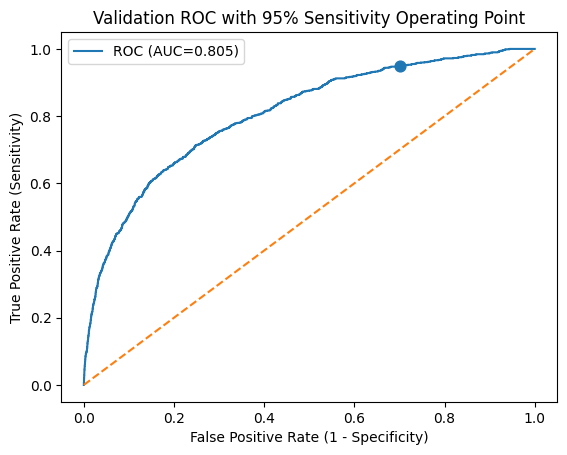

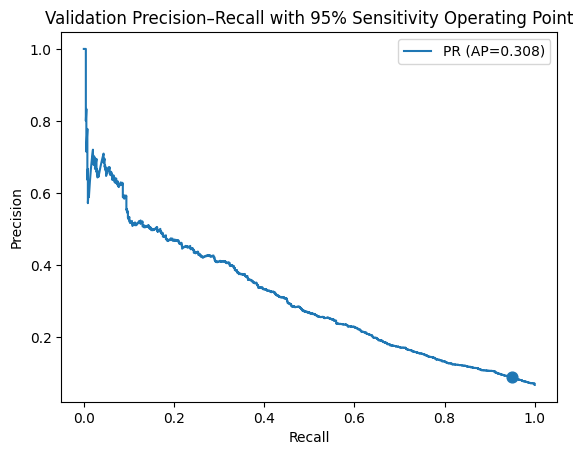


Saved: xgb_bacteremia_v4.json and xgb_threshold_and_metrics.npz


In [ ]:
import numpy as np
from sklearn.metrics import (
    roc_curve, precision_recall_curve, roc_auc_score, average_precision_score,
    confusion_matrix, precision_score, recall_score
)
import matplotlib.pyplot as plt

# 0) Get probabilities if you haven't already
val_prob  = xgb.predict_proba(val_X)[:, 1]
test_prob = xgb.predict_proba(test_X)[:, 1]

# 1) Pick threshold for 95% sensitivity on VALIDATION
target_sens = 0.95
fpr, tpr, thr = roc_curve(val_y, val_prob)

idx = np.where(tpr >= target_sens)[0]
if len(idx) == 0:
    best_idx = np.argmax(tpr)   # fallback to max achievable sensitivity
else:
    best_idx = idx[0]           # first threshold achieving >= target

best_thr = thr[best_idx]
print(f"Chosen threshold for {target_sens*100:.0f}% sensitivity (VAL): {best_thr:.6f}")
print(f"Actual VAL sensitivity at this threshold: {tpr[best_idx]:.4f}")

# 2) Helper to summarize performance
def summarize(y_true, y_prob, threshold, name):
    y_pred = (y_prob >= threshold).astype(int)
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    sens = tp / (tp + fn + 1e-9)
    spec = tn / (tn + fp + 1e-9)
    prec = precision_score(y_true, y_pred, zero_division=0)
    npv  = tn / (tn + fn + 1e-9)
    auc  = roc_auc_score(y_true, y_prob)
    ap   = average_precision_score(y_true, y_prob)
    prev = y_true.mean()
    print(f"\n{name} @ threshold={threshold:.6f}")
    print("Confusion matrix:\n", cm)
    print(f"Prevalence:            {prev:.3f}")
    print(f"ROC-AUC:               {auc:.3f}")
    print(f"PR-AUC:                {ap:.3f}")
    print(f"Sensitivity (Recall):  {sens:.3f}")
    print(f"Specificity:           {spec:.3f}")
    print(f"PPV (Precision):       {prec:.3f}")
    print(f"NPV:                   {npv:.3f}")
    return dict(threshold=threshold, sens=sens, spec=spec, prec=prec, npv=npv, auc=auc, ap=ap, cm=cm)

val_metrics  = summarize(val_y,  val_prob,  best_thr, "VALIDATION")
test_metrics = summarize(test_y, test_prob, best_thr, "TEST")

# 3) ROC & PR curves with operating point marker (on VALIDATION)
# ROC
fpr, tpr, thr = roc_curve(val_y, val_prob)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC (AUC={roc_auc_score(val_y, val_prob):.3f})")
plt.scatter(fpr[best_idx], tpr[best_idx], s=60)  # operating point
plt.plot([0,1],[0,1], linestyle="--")
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.title("Validation ROC with 95% Sensitivity Operating Point")
plt.legend()
plt.show()

# PR
prec, rec, pr_thr = precision_recall_curve(val_y, val_prob)
plt.figure()
plt.plot(rec, prec, label=f"PR (AP={average_precision_score(val_y, val_prob):.3f})")
# Map ROC operating point threshold to PR curve index (closest threshold)
if len(pr_thr) > 0:
    op_idx = np.argmin(np.abs(pr_thr - best_thr))
    plt.scatter(rec[op_idx], prec[op_idx], s=60)  # operating point
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Validation Precision–Recall with 95% Sensitivity Operating Point")
plt.legend()
plt.show()

# # 4) (Optional) persist the operating point & model
# np.savez("xgb_threshold_and_metrics.npz",
#          threshold=best_thr,
#          val_metrics=val_metrics,
#          test_metrics=test_metrics)
# xgb.save_model("xgb_bacteremia_v4.json")
print("\nSaved: xgb_bacteremia_v4.json and xgb_threshold_and_metrics.npz")


Chosen threshold for 95% sensitivity (VAL): 0.102428
Actual VAL sensitivity at this threshold: 0.9506

VALIDATION @ threshold=0.102428
Confusion matrix:
 [[3745 8777]
 [  44  846]]
Prevalence:            0.066
ROC-AUC:               0.805
PR-AUC:                0.308
Sensitivity (Recall):  0.951
Specificity:           0.299
PPV (Precision):       0.088
NPV:                   0.988

TEST @ threshold=0.102428
Confusion matrix:
 [[ 3926 10155]
 [   42  1021]]
Prevalence:            0.070
ROC-AUC:               0.810
PR-AUC:                0.307
Sensitivity (Recall):  0.960
Specificity:           0.279
PPV (Precision):       0.091
NPV:                   0.989


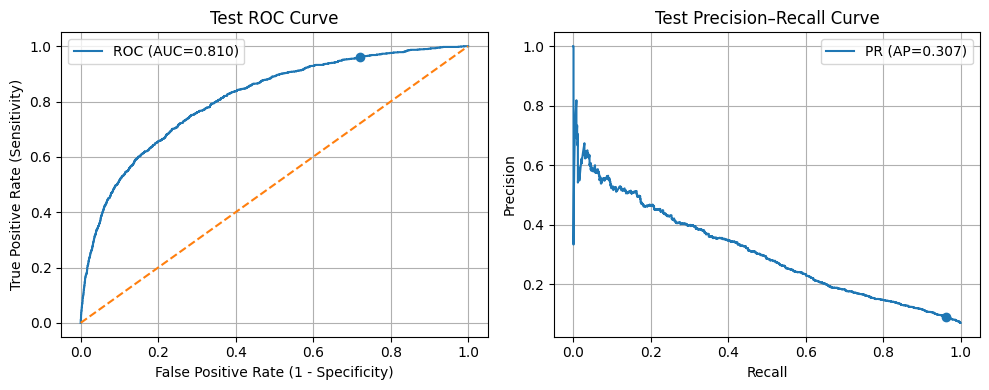

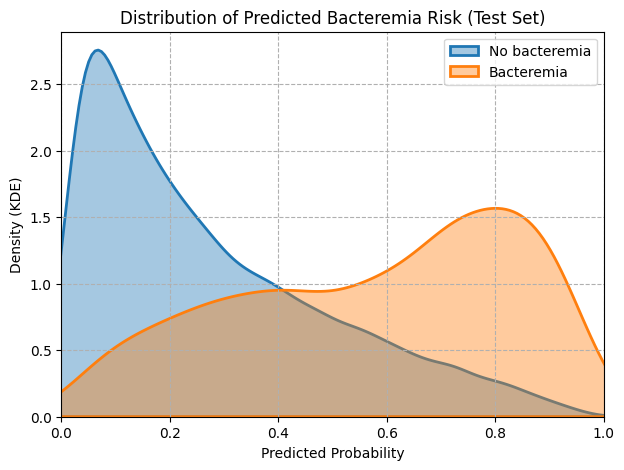

In [46]:
import numpy as np
from sklearn.metrics import (
    roc_curve, precision_recall_curve, roc_auc_score, average_precision_score,
    confusion_matrix, precision_score
)
import matplotlib.pyplot as plt

# -------------------------------------------------
# 0) Get raw predicted probabilities
# -------------------------------------------------
val_prob  = xgb.predict_proba(val_X)[:, 1]
test_prob = xgb.predict_proba(test_X)[:, 1]

# -------------------------------------------------
# 1) Pick threshold for 95% sensitivity on VALIDATION
# -------------------------------------------------
target_sens = 0.95
fpr_val, tpr_val, thr_val = roc_curve(val_y, val_prob)

idx = np.where(tpr_val >= target_sens)[0]
if len(idx) == 0:
    best_idx = np.argmax(tpr_val)   # fallback to max achievable sensitivity
else:
    best_idx = idx[0]               # first threshold achieving >= target

best_thr = thr_val[best_idx]
print(f"Chosen threshold for {target_sens*100:.0f}% sensitivity (VAL): {best_thr:.6f}")
print(f"Actual VAL sensitivity at this threshold: {tpr_val[best_idx]:.4f}")

# -------------------------------------------------
# 2) Helper to summarize performance at a threshold
# -------------------------------------------------
def summarize(y_true, y_prob, threshold, name):
    y_pred = (y_prob >= threshold).astype(int)
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    sens = tp / (tp + fn + 1e-9)
    spec = tn / (tn + fp + 1e-9)
    prec = precision_score(y_true, y_pred, zero_division=0)
    npv  = tn / (tn + fn + 1e-9)
    auc  = roc_auc_score(y_true, y_prob)
    ap   = average_precision_score(y_true, y_prob)
    prev = y_true.mean()
    print(f"\n{name} @ threshold={threshold:.6f}")
    print("Confusion matrix:\n", cm)
    print(f"Prevalence:            {prev:.3f}")
    print(f"ROC-AUC:               {auc:.3f}")
    print(f"PR-AUC:                {ap:.3f}")
    print(f"Sensitivity (Recall):  {sens:.3f}")
    print(f"Specificity:           {spec:.3f}")
    print(f"PPV (Precision):       {prec:.3f}")
    print(f"NPV:                   {npv:.3f}")
    return dict(threshold=threshold, sens=sens, spec=spec,
                prec=prec, npv=npv, auc=auc, ap=ap, cm=cm)

val_metrics  = summarize(val_y,  val_prob,  best_thr, "VALIDATION")
test_metrics = summarize(test_y, test_prob, best_thr, "TEST")

# -------------------------------------------------
# 3) ROC & PR curves on TEST set with operating point
# -------------------------------------------------
fpr_test, tpr_test, thr_test = roc_curve(test_y, test_prob)
prec_test, rec_test, thr_pr_test = precision_recall_curve(test_y, test_prob)

# find PR operating point closest to best_thr
if len(thr_pr_test) > 0:
    op_idx_pr = np.argmin(np.abs(thr_pr_test - best_thr))
else:
    op_idx_pr = None

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# ROC curve (test)
axes[0].plot(fpr_test, tpr_test, label=f"ROC (AUC={roc_auc_score(test_y, test_prob):.3f})")
# mark operating point
op_idx_roc = np.argmin(np.abs(thr_test - best_thr))
axes[0].scatter(fpr_test[op_idx_roc], tpr_test[op_idx_roc])
axes[0].plot([0, 1], [0, 1], linestyle="--")
axes[0].set_xlabel("False Positive Rate (1 - Specificity)")
axes[0].set_ylabel("True Positive Rate (Sensitivity)")
axes[0].set_title("Test ROC Curve")
axes[0].legend()
axes[0].grid(True)

# PR curve (test)
axes[1].plot(rec_test, prec_test, label=f"PR (AP={average_precision_score(test_y, test_prob):.3f})")
if op_idx_pr is not None and op_idx_pr < len(rec_test):
    axes[1].scatter(rec_test[op_idx_pr], prec_test[op_idx_pr])
axes[1].set_xlabel("Recall")
axes[1].set_ylabel("Precision")
axes[1].set_title("Test Precision–Recall Curve")
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

# -------------------------------------------------
# 4) Probability distribution plot (test set)
# -------------------------------------------------
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns # <-- Import seaborn for KDE plots

# -------------------------------------------------
# 4) Probability distribution plot (test set)
# -------------------------------------------------
plt.figure(figsize=(7, 5))

neg_mask = (test_y == 0)
pos_mask = (test_y == 1)

# Use seaborn.kdeplot instead of plt.hist
sns.kdeplot(test_prob[neg_mask], label="No bacteremia", fill=True, alpha=0.4, linewidth=2)
sns.kdeplot(test_prob[pos_mask], label="Bacteremia", fill=True, alpha=0.4, linewidth=2)

# Set the limits for the x-axis to cover the probability range
plt.xlim(0, 1)

plt.xlabel("Predicted Probability")
plt.ylabel("Density (KDE)")
plt.title("Distribution of Predicted Bacteremia Risk (Test Set)")
plt.legend()
plt.grid(True, linestyle='--')
plt.show()



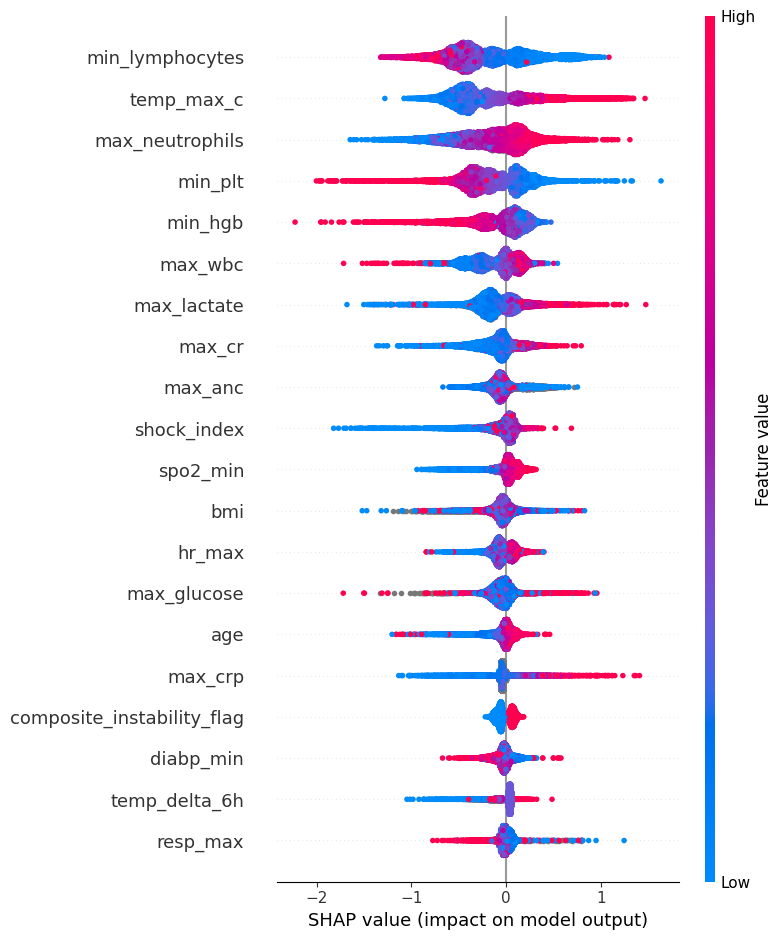

In [12]:
import shap
import matplotlib.pyplot as plt

# Create the SHAP explainer
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(val_X)

# Simple summary plot (beeswarm)
shap.summary_plot(shap_values, val_X, show=True)
plt.show()


# Calibrated Risk Score

In [17]:
from sklearn.linear_model import LogisticRegression
import numpy as np

# 1) Raw predicted probabilities from XGBoost
train_proba_raw = xgb.predict_proba(train_X)[:, 1]
val_proba_raw   = xgb.predict_proba(val_X)[:, 1]
test_proba_raw  = xgb.predict_proba(test_X)[:, 1]

# 2) Fit Platt scaling (logistic regression on validation probs)
platt = LogisticRegression(
    solver="lbfgs",
    penalty="l2",
    max_iter=1000
)

# X must be 2D
platt.fit(val_proba_raw.reshape(-1, 1), val_y)

# 3) Calibrated probabilities
val_proba_cal  = platt.predict_proba(val_proba_raw.reshape(-1, 1))[:, 1]
test_proba_cal = platt.predict_proba(test_proba_raw.reshape(-1, 1))[:, 1]

# (Optional) check calibration quickly with Brier score
from sklearn.metrics import brier_score_loss

print("Brier raw (val):", brier_score_loss(val_y, val_proba_raw))
print("Brier cal (val):", brier_score_loss(val_y, val_proba_cal))


Brier raw (val): 0.1211711860734408
Brier cal (val): 0.053498186523927


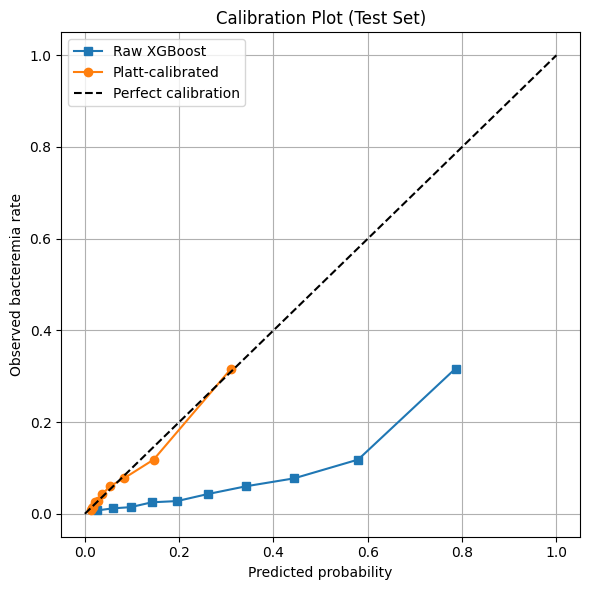

In [33]:
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve

# ---- Choose which split to visualize (recommended: test for manuscript) ----
y_true_plot      = test_y
proba_raw_plot   = test_proba_raw
proba_cal_plot   = test_proba_cal

# ---- Compute calibration curves ----
frac_pos_raw, mean_pred_raw = calibration_curve(
    y_true_plot, proba_raw_plot, n_bins=10, strategy="quantile"
)

frac_pos_cal, mean_pred_cal = calibration_curve(
    y_true_plot, proba_cal_plot, n_bins=10, strategy="quantile"
)

# ---- Plot ----
plt.figure(figsize=(6, 6))
plt.plot(mean_pred_raw, frac_pos_raw, "s-", label="Raw XGBoost")
plt.plot(mean_pred_cal, frac_pos_cal, "o-", label="Platt-calibrated")

# Ideal line
plt.plot([0, 1], [0, 1], "k--", label="Perfect calibration")

plt.xlabel("Predicted probability")
plt.ylabel("Observed bacteremia rate")
plt.title("Calibration Plot (Test Set)")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()


/var/folders/d1/3gdyy98d6h1d9pxx47s40vv40000gp/T/ipykernel_35386/2107954306.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(p[y==0], label="Negatives", shade=True, bw_adjust=1.2)
/var/folders/d1/3gdyy98d6h1d9pxx47s40vv40000gp/T/ipykernel_35386/2107954306.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(p[y==1], label="Positives", shade=True, bw_adjust=1.2, color="red")


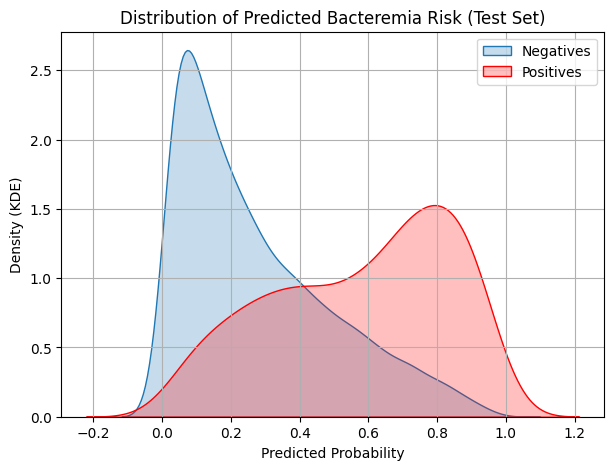

In [47]:
import seaborn as sns

# Choose set
p = test_prob   # or p_val
y = test_y   # or y_val

plt.figure(figsize=(7,5))

sns.kdeplot(p[y==0], label="Negatives", shade=True, bw_adjust=1.2)
sns.kdeplot(p[y==1], label="Positives", shade=True, bw_adjust=1.2, color="red")

plt.xlabel("Predicted Probability")
plt.ylabel("Density (KDE)")
plt.title("Distribution of Predicted Bacteremia Risk (Test Set)")
plt.legend()
plt.grid(True)
plt.show()

In [23]:
from sklearn.metrics import confusion_matrix, roc_auc_score, average_precision_score

def confusion_metrics(y_true, y_score, threshold):
    y_pred = (y_score >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    prevalence = (y_true.mean())
    sens = tp / (tp + fn) if (tp + fn) > 0 else np.nan
    spec = tn / (tn + fp) if (tn + fp) > 0 else np.nan
    ppv  = tp / (tp + fp) if (tp + fp) > 0 else np.nan
    npv  = tn / (tn + fn) if (tn + fn) > 0 else np.nan
    return dict(
        threshold=threshold,
        tn=tn, fp=fp, fn=fn, tp=tp,
        prevalence=prevalence,
        sensitivity=sens,
        specificity=spec,
        ppv=ppv,
        npv=npv
    )


def find_threshold_for_sensitivity(y_true, y_prob, target_sens):
    """
    Choose the *highest* threshold whose sensitivity >= target_sens.
    This maximizes specificity/deferral under a sensitivity constraint.

    Parameters
    ----------
    y_true : array-like of shape (n_samples,)
        Binary ground truth (0/1).
    y_prob : array-like of shape (n_samples,)
        Predicted probabilities (CALIBRATED).
    target_sens : float
        Desired minimum sensitivity (e.g., 0.85, 0.90, 0.95, 0.98).
    """
    y_true = np.asarray(y_true)
    y_prob = np.asarray(y_prob)

    # sort thresholds from HIGH → LOW
    uniq_thr = np.unique(y_prob)
    uniq_thr_sorted = np.sort(uniq_thr)[::-1]

    best_thr = None

    for thr in uniq_thr_sorted:
        y_pred = (y_prob >= thr).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
        sens = tp / (tp + fn) if (tp + fn) > 0 else 0.0

        if sens >= target_sens:
            best_thr = thr
            # going from high → low, the FIRST time we hit sens >= target_sens
            # is the *largest* such threshold
            break

    return best_thr


# -------------------------------------------------------------------
# Operating points + bottle savings
# -------------------------------------------------------------------

# include a <90% sensitivity scenario (e.g., 0.85)
target_sensitivities = [0.85, 0.90, 0.95, 0.98]

# If you don't have per-encounter set counts on test:
median_sets_per_encounter = 2.0   # <-- replace with real median when ready
bottles_per_set = 2

results = {}

# For cohort-level bottle savings
n_test = len(test_y)
total_bottles_baseline = n_test * median_sets_per_encounter * bottles_per_set

for target in target_sensitivities:
    thr = find_threshold_for_sensitivity(val_y.values, val_proba_cal, target)
    print(f"\nTarget sensitivity {target:.2f} → chosen threshold on val: {thr:.4f}")

    val_metrics  = confusion_metrics(val_y.values,  val_proba_cal, thr)
    test_metrics = confusion_metrics(test_y.values, test_proba_cal, thr)

    # defer rate and bottle savings on test set
    y_pred_test = (test_proba_cal >= thr).astype(int)  # 1 = recommend culture
    defer_mask  = (y_pred_test == 0)
    defer_rate  = defer_mask.mean()

    # bottles saved (approx.) using median sets/encounter
    bottles_saved_total = defer_rate * total_bottles_baseline
    bottles_saved_pct   = bottles_saved_total / total_bottles_baseline

    # per 10,000 encounters (same assumption)
    bottles_saved_per_10k = defer_rate * 10000 * median_sets_per_encounter * bottles_per_set

    # missed positives
    fn = test_metrics["fn"]
    tp = test_metrics["tp"]
    missed_pos_pct = fn / (fn + tp) if (fn + tp) > 0 else np.nan

    # stash extra fields
    test_metrics["defer_rate"] = defer_rate
    test_metrics["bottles_saved_per_10k"] = bottles_saved_per_10k
    test_metrics["bottles_saved_total"] = bottles_saved_total
    test_metrics["bottles_saved_pct"] = bottles_saved_pct
    test_metrics["missed_positives"] = fn
    test_metrics["missed_positives_pct"] = missed_pos_pct

    results[target] = dict(
        threshold=thr,
        val=val_metrics,
        test=test_metrics,
    )

# quick look
for target, d in results.items():
    tm = d["test"]
    fn = tm["fn"]
    tp = tm["tp"]
    missed_pct = fn / (fn + tp) if (fn + tp) > 0 else np.nan

    print(f"\n=== Target sens {target:.2f} on test ===")
    print(f"Threshold (on calibrated prob): {d['threshold']:.4f}")
    print(f"Sensitivity: {tm['sensitivity']:.3f}, Specificity: {tm['specificity']:.3f}")
    print(f"PPV: {tm['ppv']:.3f}, NPV: {tm['npv']:.3f}")
    print(f"Defer rate: {tm['defer_rate']:.3f}")
    print(f"Missed positives (FN): {fn} / {fn + tp} "
          f"({missed_pct:.3%})")
    print(f"Estimated bottles saved / 10,000 encounters: {tm['bottles_saved_per_10k']:.1f}")
    print(f"Bottles saved in this test cohort (approx): {tm['bottles_saved_total']:.0f} "
          f"({tm['bottles_saved_pct']*100:.1f}%)")



Target sensitivity 0.85 → chosen threshold on val: 0.0311

Target sensitivity 0.90 → chosen threshold on val: 0.0247

Target sensitivity 0.95 → chosen threshold on val: 0.0180

Target sensitivity 0.98 → chosen threshold on val: 0.0142

=== Target sens 0.85 on test ===
Threshold (on calibrated prob): 0.0311
Sensitivity: 0.879, Specificity: 0.524
PPV: 0.122, NPV: 0.983
Defer rate: 0.496
Missed positives (FN): 129 / 1063 (12.135%)
Estimated bottles saved / 10,000 encounters: 19846.8
Bottles saved in this test cohort (approx): 30056 (49.6%)

=== Target sens 0.90 on test ===
Threshold (on calibrated prob): 0.0247
Sensitivity: 0.913, Specificity: 0.434
PPV: 0.108, NPV: 0.985
Defer rate: 0.409
Missed positives (FN): 93 / 1063 (8.749%)
Estimated bottles saved / 10,000 encounters: 16376.1
Bottles saved in this test cohort (approx): 24800 (40.9%)

=== Target sens 0.95 on test ===
Threshold (on calibrated prob): 0.0180
Sensitivity: 0.960, Specificity: 0.279
PPV: 0.091, NPV: 0.989
Defer rate: 0.2

In [ ]:
# Convert to bedside point system from SHAP value

In [26]:
import numpy as np
import pandas as pd

# 1) Define age groups on the original data splits (same as before)
age_bins   = [0, 40, 60, 80, 200]
age_labels = ["<40", "40–59", "60–79", "≥80"]

for df in [train_data, val_data, test_data]:
    df["age_group"] = pd.cut(df["age"], bins=age_bins, labels=age_labels, right=False)

# 2) Rebuild X matrices (same as before)
def make_split(df):
    X = build_core_features(df)
    y = (df['final_label'] == 'positive').astype(int)
    return X, y

train_X, train_y = make_split(train_data)
val_X,   val_y   = make_split(val_data)
test_X,  test_y  = make_split(test_data)

# ensure same columns
val_X  = val_X.reindex(columns=train_X.columns)
test_X = test_X.reindex(columns=train_X.columns)

feature_cols = train_X.columns.tolist()

# 3) Build train-only table with age_group + gender
train_aux = train_data[["age_group", "gender"]].reset_index(drop=True)
train_for_imp = pd.concat([train_aux, train_X.reset_index(drop=True)], axis=1)

# 4) Group medians (age_group × gender) + global medians
group_medians = (
    train_for_imp
    .groupby(["age_group", "gender"])[feature_cols]
    .median()
    .reset_index()
)

global_medians = train_X.median()

# Fill any NaNs in group_medians with global medians so we always have a value
for col in feature_cols:
    group_medians[col] = group_medians[col].fillna(global_medians[col])

# 5) Vectorized imputation function
def impute_by_group_fast(df_feat, df_meta):
    """
    df_feat: feature matrix (X)
    df_meta: DataFrame with columns ['age_group', 'gender']
    Uses train-based age_group×gender medians; falls back to global medians if group missing.
    """
    df_feat = df_feat.reset_index(drop=True)
    df_meta = df_meta[["age_group", "gender"]].reset_index(drop=True)

    # Merge metadata with group_medians to get a per-row median row
    med_row_per_case = df_meta.merge(
        group_medians,
        on=["age_group", "gender"],
        how="left"
    )

    # Keep only the feature columns from the merged medians
    med_values = med_row_per_case[feature_cols]

    # If for some reason a group is missing, fall back to global medians
    med_values = med_values.fillna(global_medians)

    # Now fill NaNs in df_feat with these per-row medians (vectorized)
    df_imp = df_feat.copy()
    df_imp[feature_cols] = df_imp[feature_cols].where(
        ~df_imp[feature_cols].isna(),
        med_values
    )

    return df_imp

# 6) Apply to train/val/test
train_meta = train_data[["age_group", "gender"]]
val_meta   = val_data[["age_group", "gender"]]
test_meta  = test_data[["age_group", "gender"]]

train_X_imp = impute_by_group_fast(train_X, train_meta)
val_X_imp   = impute_by_group_fast(val_X,   val_meta)
test_X_imp  = impute_by_group_fast(test_X,  test_meta)

print("Missing after imputation:")
print("train:", train_X_imp.isna().sum().sum())
print("val:  ", val_X_imp.isna().sum().sum())
print("test: ", test_X_imp.isna().sum().sum())


/var/folders/d1/3gdyy98d6h1d9pxx47s40vv40000gp/T/ipykernel_35386/2722435710.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["age_group"] = pd.cut(df["age"], bins=age_bins, labels=age_labels, right=False)
/var/folders/d1/3gdyy98d6h1d9pxx47s40vv40000gp/T/ipykernel_35386/2722435710.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["age_group"] = pd.cut(df["age"], bins=age_bins, labels=age_labels, right=False)
/var/folders/d1/3gdyy98d6h1d9pxx47s40vv40000gp/T/ipykernel_35386/2722435710.py:9: SettingW

Missing after imputation:
train: 0
val:   0
test:  0


In [31]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, average_precision_score
import shap

# --------------------------------------------------
# 1) SHAP-based feature ranking (on validation set)
# --------------------------------------------------
# If you already computed explainer/shap_values, you can reuse them.
# Here is a self-contained block:

explainer = shap.TreeExplainer(xgb)
shap_values_val = explainer.shap_values(val_X_imp)  # shape: (n_val, n_features)

# mean |SHAP| per feature
mean_abs_shap = np.abs(shap_values_val).mean(axis=0)
shap_importance = pd.DataFrame({
    "feature": val_X_imp.columns,
    "mean_abs_shap": mean_abs_shap
}).sort_values("mean_abs_shap", ascending=False)

# Exclude spo2_min if present
exclude_feats = ["spo2_min"]
shap_importance = shap_importance[~shap_importance["feature"].isin(exclude_feats)]

# Pick top 15
top_n = 15
top_features = shap_importance["feature"].head(top_n).tolist()

print("Top SHAP features (excluding spo2_min):")
for i, (f, v) in enumerate(zip(top_features,
                               shap_importance["mean_abs_shap"].head(top_n)), start=1):
    print(f"{i:2d}. {f:20s} mean|SHAP| = {v:.5f}")

# --------------------------------------------------
# # 2) Build LR design matrices for those features
# #    using *imputed* data
# # --------------------------------------------------
# Xtr_lr = train_X_imp[top_features].copy()
# Xval_lr = val_X_imp[top_features].copy()
# Xte_lr = test_X_imp[top_features].copy()

# print("\nLR data shapes (before scaling):")
# print("  Train:", Xtr_lr.shape)
# print("  Val:  ", Xval_lr.shape)
# print("  Test: ", Xte_lr.shape)

# # --------------------------------------------------
# # 3) Standardize by train mean/std only
# # --------------------------------------------------
# scaler = StandardScaler()
# Xtr_lr_std = scaler.fit_transform(Xtr_lr)
# Xval_lr_std = scaler.transform(Xval_lr)
# Xte_lr_std = scaler.transform(Xte_lr)

# # --------------------------------------------------
# # 4) Fit logistic regression on standardized features
# # --------------------------------------------------
# lr = LogisticRegression(
#     penalty="l2",
#     C=1.0,
#     solver="lbfgs",
#     max_iter=5000,        # increase to avoid convergence warning
#     class_weight="balanced",
# )

# lr.fit(Xtr_lr_std, train_y)

# # --------------------------------------------------
# # 5) Evaluate performance
# # --------------------------------------------------
# val_proba_lr  = lr.predict_proba(Xval_lr_std)[:, 1]
# test_proba_lr = lr.predict_proba(Xte_lr_std)[:, 1]

# print("\nLogistic Regression Performance (standardized top SHAP features):")
# print("  AUC  (val): ", roc_auc_score(val_y,  val_proba_lr))
# print("  AUC  (test):", roc_auc_score(test_y, test_proba_lr))
# print("  PR-AUC (val): ", average_precision_score(val_y,  val_proba_lr))
# print("  PR-AUC (test):", average_precision_score(test_y, test_proba_lr))

# # --------------------------------------------------
# # 6) Coefficient table (mapped back to features)
# # --------------------------------------------------
# coef_df = pd.DataFrame({
#     "feature": top_features,
#     "coef": lr.coef_[0]
# }).sort_values("coef", ascending=False)

# print("\nLogistic regression coefficients (descending, standardized features):")
# print(coef_df.to_string(index=False))


Top SHAP features (excluding spo2_min):
 1. temp_max_c           mean|SHAP| = 0.36435
 2. min_lymphocytes      mean|SHAP| = 0.36137
 3. max_neutrophils      mean|SHAP| = 0.32378
 4. min_plt              mean|SHAP| = 0.28705
 5. min_hgb              mean|SHAP| = 0.21953
 6. max_crp              mean|SHAP| = 0.19006
 7. max_wbc              mean|SHAP| = 0.18179
 8. max_cr               mean|SHAP| = 0.15547
 9. max_lactate          mean|SHAP| = 0.15507
10. shock_index          mean|SHAP| = 0.10939
11. max_anc              mean|SHAP| = 0.09362
12. bmi                  mean|SHAP| = 0.08981
13. hr_max               mean|SHAP| = 0.08632
14. max_glucose          mean|SHAP| = 0.08564
15. age                  mean|SHAP| = 0.08518


In [44]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, average_precision_score

# ------------ A. Define binary cutoffs for each feature ------------

def make_binary_features(df):
    """
    df: DataFrame with continuous features already imputed
        (e.g., train_X_imp / val_X_imp / test_X_imp)
    
    Returns: DataFrame with binary 0/1 "risk flags"
    """

    out = pd.DataFrame(index=df.index)

    # --- Updated per your requested thresholds ---

    # Temperature: > 38 °C
    out["temp_flag"]   = (df["temp_max_c"] > 38.0).astype(int)

    # Lymphocytes: < 20
    out["lymph_low"]   = (df["min_lymphocytes"] < 20).astype(int)

    # Neutrophils (%): > 70
    out["neut_high"]   = (df["max_neutrophils"] > 70).astype(int)

    # Platelets (K/uL): < 150  (unchanged, matches your threshold)
    out["plt_low"]     = (df["min_plt"] < 150).astype(int)

    # Hemoglobin (g/dL): < 12
    out["hgb_low"]     = (df["min_hgb"] < 12).astype(int)

    # WBC (K/uL): keep > 12 as before
    out["wbc_high"]    = (df["max_wbc"] > 12).astype(int)

    # Lactate (mmol/L): > 1.5
    out["lact_high"]   = (df["max_lactate"] > 1.5).astype(int)

    # Creatinine (mg/dL): keep ≥ 1.2
    out["cr_high"]     = (df["max_cr"] >= 1.2).astype(int)

    # CRP (mg/dL): keep ≥ 10 (≈ 100 mg/L if in mg/L units)
    out["crp_high"]    = (df["max_crp"] >= 10).astype(int)

    # Shock index (HR / SBP): keep ≥ 0.9
    out["si_high"]     = (df["shock_index"] >= 0.9).astype(int)

    # Absolute neutrophil count (K/uL): keep > 7.5
    out["anc_high"]    = (df["max_anc"] > 7.5).astype(int)

    # Heart rate: > 100 (was > 120 before)
    out["hr_high"]     = (df["hr_max"] > 100).astype(int)

    # Glucose (mg/dL): > 127
    out["glu_high"]    = (df["max_glucose"] > 127).astype(int)

    # Age: ≥ 65
    out["age_old"]     = (df["age"] >= 65).astype(int)

    # BMI – abnormal low or high (unchanged)
    out["bmi_abn"]     = ((df["bmi"] < 18.5) | (df["bmi"] > 35)).astype(int)


    return out

# ------------ B. Build binary design matrices ------------

train_bin = make_binary_features(train_X_imp)
val_bin   = make_binary_features(val_X_imp)
test_bin  = make_binary_features(test_X_imp)

print("Binary feature shapes:")
print(" Train:", train_bin.shape)
print(" Val:  ", val_bin.shape)
print(" Test: ", test_bin.shape)

# ------------ C. Fit logistic regression on binary features ------------

lr_bin = LogisticRegression(
    penalty="l2",
    C=1.0,
    solver="lbfgs",
    max_iter=2000,
    class_weight="balanced",
)

lr_bin.fit(train_bin, train_y)

val_proba_bin  = lr_bin.predict_proba(val_bin)[:, 1]
test_proba_bin = lr_bin.predict_proba(test_bin)[:, 1]

print("\nLogistic (binary flags) performance:")
print(" AUC  (val): ", roc_auc_score(val_y,  val_proba_bin))
print(" AUC  (test):", roc_auc_score(test_y, test_proba_bin))
print(" PR-AUC (val): ", average_precision_score(val_y,  val_proba_bin))
print(" PR-AUC (test):", average_precision_score(test_y, test_proba_bin))

# ------------ D. Derive points from coefficients ------------

coef_series = pd.Series(lr_bin.coef_[0], index=train_bin.columns).sort_values(ascending=False)
print("\nLogistic coefficients (binary features):")
print(coef_series)

# Choose scaling: 1 point ≈ 0.25 log-odds (OR ≈ 1.28)
POINT_SCALE = 0.25

raw_points = (coef_series / POINT_SCALE).round()

# Optional: clip negative or tiny values to 0 for bedside simplicity
points = raw_points.copy()
points[points < 0] = 0  # no negative points
# Optionally, also zero out very small effects:
# points[coef_series.abs() < 0.15] = 0

print("\nPoint weights (per binary feature):")
print(points)

score_artifacts = {
    "lr_bin": lr_bin,
    "points": points,
    "feature_names": list(train_bin.columns),
}


Binary feature shapes:
 Train: (73256, 15)
 Val:   (13412, 15)
 Test:  (15144, 15)

Logistic (binary flags) performance:
 AUC  (val):  0.7626069353892206
 AUC  (test): 0.7595063315638595
 PR-AUC (val):  0.1968718718210914
 PR-AUC (test): 0.20328108301362

Logistic coefficients (binary features):
temp_flag    1.007456
neut_high    0.780083
plt_low      0.663311
crp_high     0.657539
lact_high    0.449167
hgb_low      0.409953
wbc_high     0.384132
cr_high      0.359773
lymph_low    0.329864
anc_high     0.290723
si_high      0.284040
hr_high      0.167728
age_old      0.114931
glu_high     0.110357
bmi_abn      0.003551
dtype: float64

Point weights (per binary feature):
temp_flag    4.0
neut_high    3.0
plt_low      3.0
crp_high     3.0
lact_high    2.0
hgb_low      2.0
wbc_high     2.0
cr_high      1.0
lymph_low    1.0
anc_high     1.0
si_high      1.0
hr_high      1.0
age_old      0.0
glu_high     0.0
bmi_abn      0.0
dtype: float64


In [48]:
from sklearn.metrics import confusion_matrix

# ------------ A. Compute total point score ------------

# Make sure we use the same feature order
def compute_total_points(bin_df, points_series):
    # align columns
    aligned = bin_df[points_series.index]
    total_pts = aligned.mul(points_series, axis=1).sum(axis=1)
    return total_pts

train_points = compute_total_points(train_bin, points)
val_points   = compute_total_points(val_bin, points)
test_points  = compute_total_points(test_bin, points)

print("Point score ranges:")
print(" Train:", train_points.min(), "→", train_points.max())
print(" Val:  ", val_points.min(),   "→", val_points.max())
print(" Test: ", test_points.min(),  "→", test_points.max())

# ------------ B. Metrics for a given point cutoff K ------------

def confusion_metrics_points(y_true, point_scores, K):
    """
    K: cutoff on total points.
    Predict positive (recommend culture) if score >= K.
    """
    y_true = np.asarray(y_true)
    score  = np.asarray(point_scores)

    y_pred = (score >= K).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    prevalence = y_true.mean()
    sens = tp / (tp + fn) if (tp + fn) > 0 else np.nan
    spec = tn / (tn + fp) if (tn + fp) > 0 else np.nan
    ppv  = tp / (tp + fp) if (tp + fp) > 0 else np.nan
    npv  = tn / (tn + fn) if (tn + fn) > 0 else np.nan

    return dict(
        K=K,
        tn=tn, fp=fp, fn=fn, tp=tp,
        prevalence=prevalence,
        sensitivity=sens,
        specificity=spec,
        ppv=ppv,
        npv=npv,
    )

# ------------ C. Choose K to satisfy a target sensitivity ------------

def find_K_for_sensitivity(y_true, point_scores, target_sens):
    """
    Scan K from high → low and return the *largest* K
    whose sensitivity >= target_sens on the validation set.
    """
    y_true = np.asarray(y_true)
    score  = np.asarray(point_scores)

    unique_K = np.unique(score)
    unique_K_sorted = np.sort(unique_K)[::-1]  # high → low

    best_K = None

    for K in unique_K_sorted:
        metrics = confusion_metrics_points(y_true, score, K)
        sens = metrics["sensitivity"]
        if sens >= target_sens:
            best_K = K
            break  # first (highest) K that meets sensitivity constraint

    return best_K

# ------------ D. Add deferral + bottle savings ------------

# You can update these with real values from your cohort:
median_sets_per_encounter = 2.0   # e.g., median # of blood culture sets per encounter
bottles_per_set = 2              # e.g., 2 bottles per set

def add_deferral_and_bottles(y_true, point_scores, K,
                             median_sets_per_encounter=2.0,
                             bottles_per_set=2):
    """
    Compute deferral rate, bottles saved, and missed positives
    at a given K on a given dataset.
    """
    y_true = np.asarray(y_true)
    score  = np.asarray(point_scores)

    y_pred = (score >= K).astype(int)  # 1 = recommend culture
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    n = len(y_true)
    defer_mask = (y_pred == 0)
    defer_rate = defer_mask.mean()

    # Bottle arithmetic
    total_bottles = n * median_sets_per_encounter * bottles_per_set
    bottles_saved = defer_rate * total_bottles
    pct_bottles_saved = bottles_saved / total_bottles if total_bottles > 0 else np.nan

    # Missed positives (false negatives)
    n_pos         = y_true.sum()
    n_missed      = fn
    pct_pos_missed = n_missed / n_pos if n_pos > 0 else np.nan

    metrics = confusion_metrics_points(y_true, score, K)
    metrics.update(dict(
        defer_rate=defer_rate,
        total_bottles=total_bottles,
        bottles_saved=bottles_saved,
        pct_bottles_saved=pct_bottles_saved,
        n_pos=n_pos,
        n_missed=n_missed,
        pct_pos_missed=pct_pos_missed,
    ))
    return metrics

# ------------ E. Run for several target sensitivities ------------

target_sensitivities = [0.85, 0.90, 0.95, 0.98]

results_points = {}

for target in target_sensitivities:
    K = find_K_for_sensitivity(val_y, val_points, target)
    print(f"\nTarget sensitivity {target:.2f} → chosen K on val: {K}")

    if K is None:
        print("  No K found to achieve this sensitivity on validation set.")
        continue

    val_metrics  = add_deferral_and_bottles(
        val_y, val_points, K,
        median_sets_per_encounter=median_sets_per_encounter,
        bottles_per_set=bottles_per_set,
    )
    test_metrics = add_deferral_and_bottles(
        test_y, test_points, K,
        median_sets_per_encounter=median_sets_per_encounter,
        bottles_per_set=bottles_per_set,
    )

    results_points[target] = dict(
        K=K,
        val=val_metrics,
        test=test_metrics,
    )

# ------------ F. Quick summary on TEST set ------------

for target, d in results_points.items():
    tm = d["test"]
    print(f"\n=== Points model @ target sensitivity {target:.2f} (test set) ===")
    print(f"Point cutoff K: {d['K']}")
    print(f"Sensitivity: {tm['sensitivity']:.3f}, Specificity: {tm['specificity']:.3f}")
    print(f"PPV: {tm['ppv']:.3f}, NPV: {tm['npv']:.3f}")
    print(f"Defer rate: {tm['defer_rate']:.3f}")
    print(f"Total bottles in test cohort (est): {tm['total_bottles']:.0f}")
    print(f"Bottles saved (count): {tm['bottles_saved']:.0f}")
    print(f"Bottles saved (%): {tm['pct_bottles_saved']*100:.1f}%")
    print(f"Missed positives (FN): {tm['n_missed']} / {tm['n_pos']} "
          f"({tm['pct_pos_missed']*100:.1f}%)")


Point score ranges:
 Train: 0.0 → 24.0
 Val:   0.0 → 23.0
 Test:  0.0 → 24.0

Target sensitivity 0.85 → chosen K on val: 9.0

Target sensitivity 0.90 → chosen K on val: 7.0

Target sensitivity 0.95 → chosen K on val: 6.0

Target sensitivity 0.98 → chosen K on val: 5.0

=== Points model @ target sensitivity 0.85 (test set) ===
Point cutoff K: 9.0
Sensitivity: 0.872, Specificity: 0.460
PPV: 0.109, NPV: 0.979
Defer rate: 0.437
Total bottles in test cohort (est): 60576
Bottles saved (count): 26448
Bottles saved (%): 43.7%
Missed positives (FN): 136 / 1063 (12.8%)

=== Points model @ target sensitivity 0.90 (test set) ===
Point cutoff K: 7.0
Sensitivity: 0.958, Specificity: 0.289
PPV: 0.092, NPV: 0.989
Defer rate: 0.271
Total bottles in test cohort (est): 60576
Bottles saved (count): 16432
Bottles saved (%): 27.1%
Missed positives (FN): 45 / 1063 (4.2%)

=== Points model @ target sensitivity 0.95 (test set) ===
Point cutoff K: 6.0
Sensitivity: 0.976, Specificity: 0.222
PPV: 0.086, NPV: 0.99